In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('In-Vehicle_Coupon_Recommendation.csv')
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [4]:
df.isnull().sum()/len(df)*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [5]:
df.shape

(12684, 25)

In [6]:
#change temperature into a category as its an ordinal datatype
df['temperature'] = df['temperature'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   coupon                12684 non-null  object  
 5   expiration            12684 non-null  object  
 6   gender                12684 non-null  object  
 7   age                   12684 non-null  object  
 8   maritalStatus         12684 non-null  object  
 9   has_children          12684 non-null  int64   
 10  education             12684 non-null  object  
 11  occupation            12684 non-null  object  
 12  income                12684 non-null  object  
 13  car                   108 non-null    object  
 14  Bar                   12577 non-null  object  
 15  Co

In [7]:
df["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [8]:
df.drop('car', inplace=True, axis=1)

In [9]:
for x in df.columns[df.isna().any()]:
    df = df.fillna({x: df[x].value_counts().idxmax()})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   coupon                12684 non-null  object  
 5   expiration            12684 non-null  object  
 6   gender                12684 non-null  object  
 7   age                   12684 non-null  object  
 8   maritalStatus         12684 non-null  object  
 9   has_children          12684 non-null  int64   
 10  education             12684 non-null  object  
 11  occupation            12684 non-null  object  
 12  income                12684 non-null  object  
 13  Bar                   12684 non-null  object  
 14  CoffeeHouse           12684 non-null  object  
 15  Ca

In [11]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Accept(Y/N?)               int64
dtype: object

In [12]:
#lets do some statistcal analysis
df.describe(include='all')

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684.000000,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,2,2,8,5,NaN,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,Coffee House,1d,Female,21,Married partner,NaN,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3996,7091,6511,2653,5100,NaN,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414144,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492593,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [13]:
df.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Accept(Y/N?)         2
dtype: int64

In [14]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

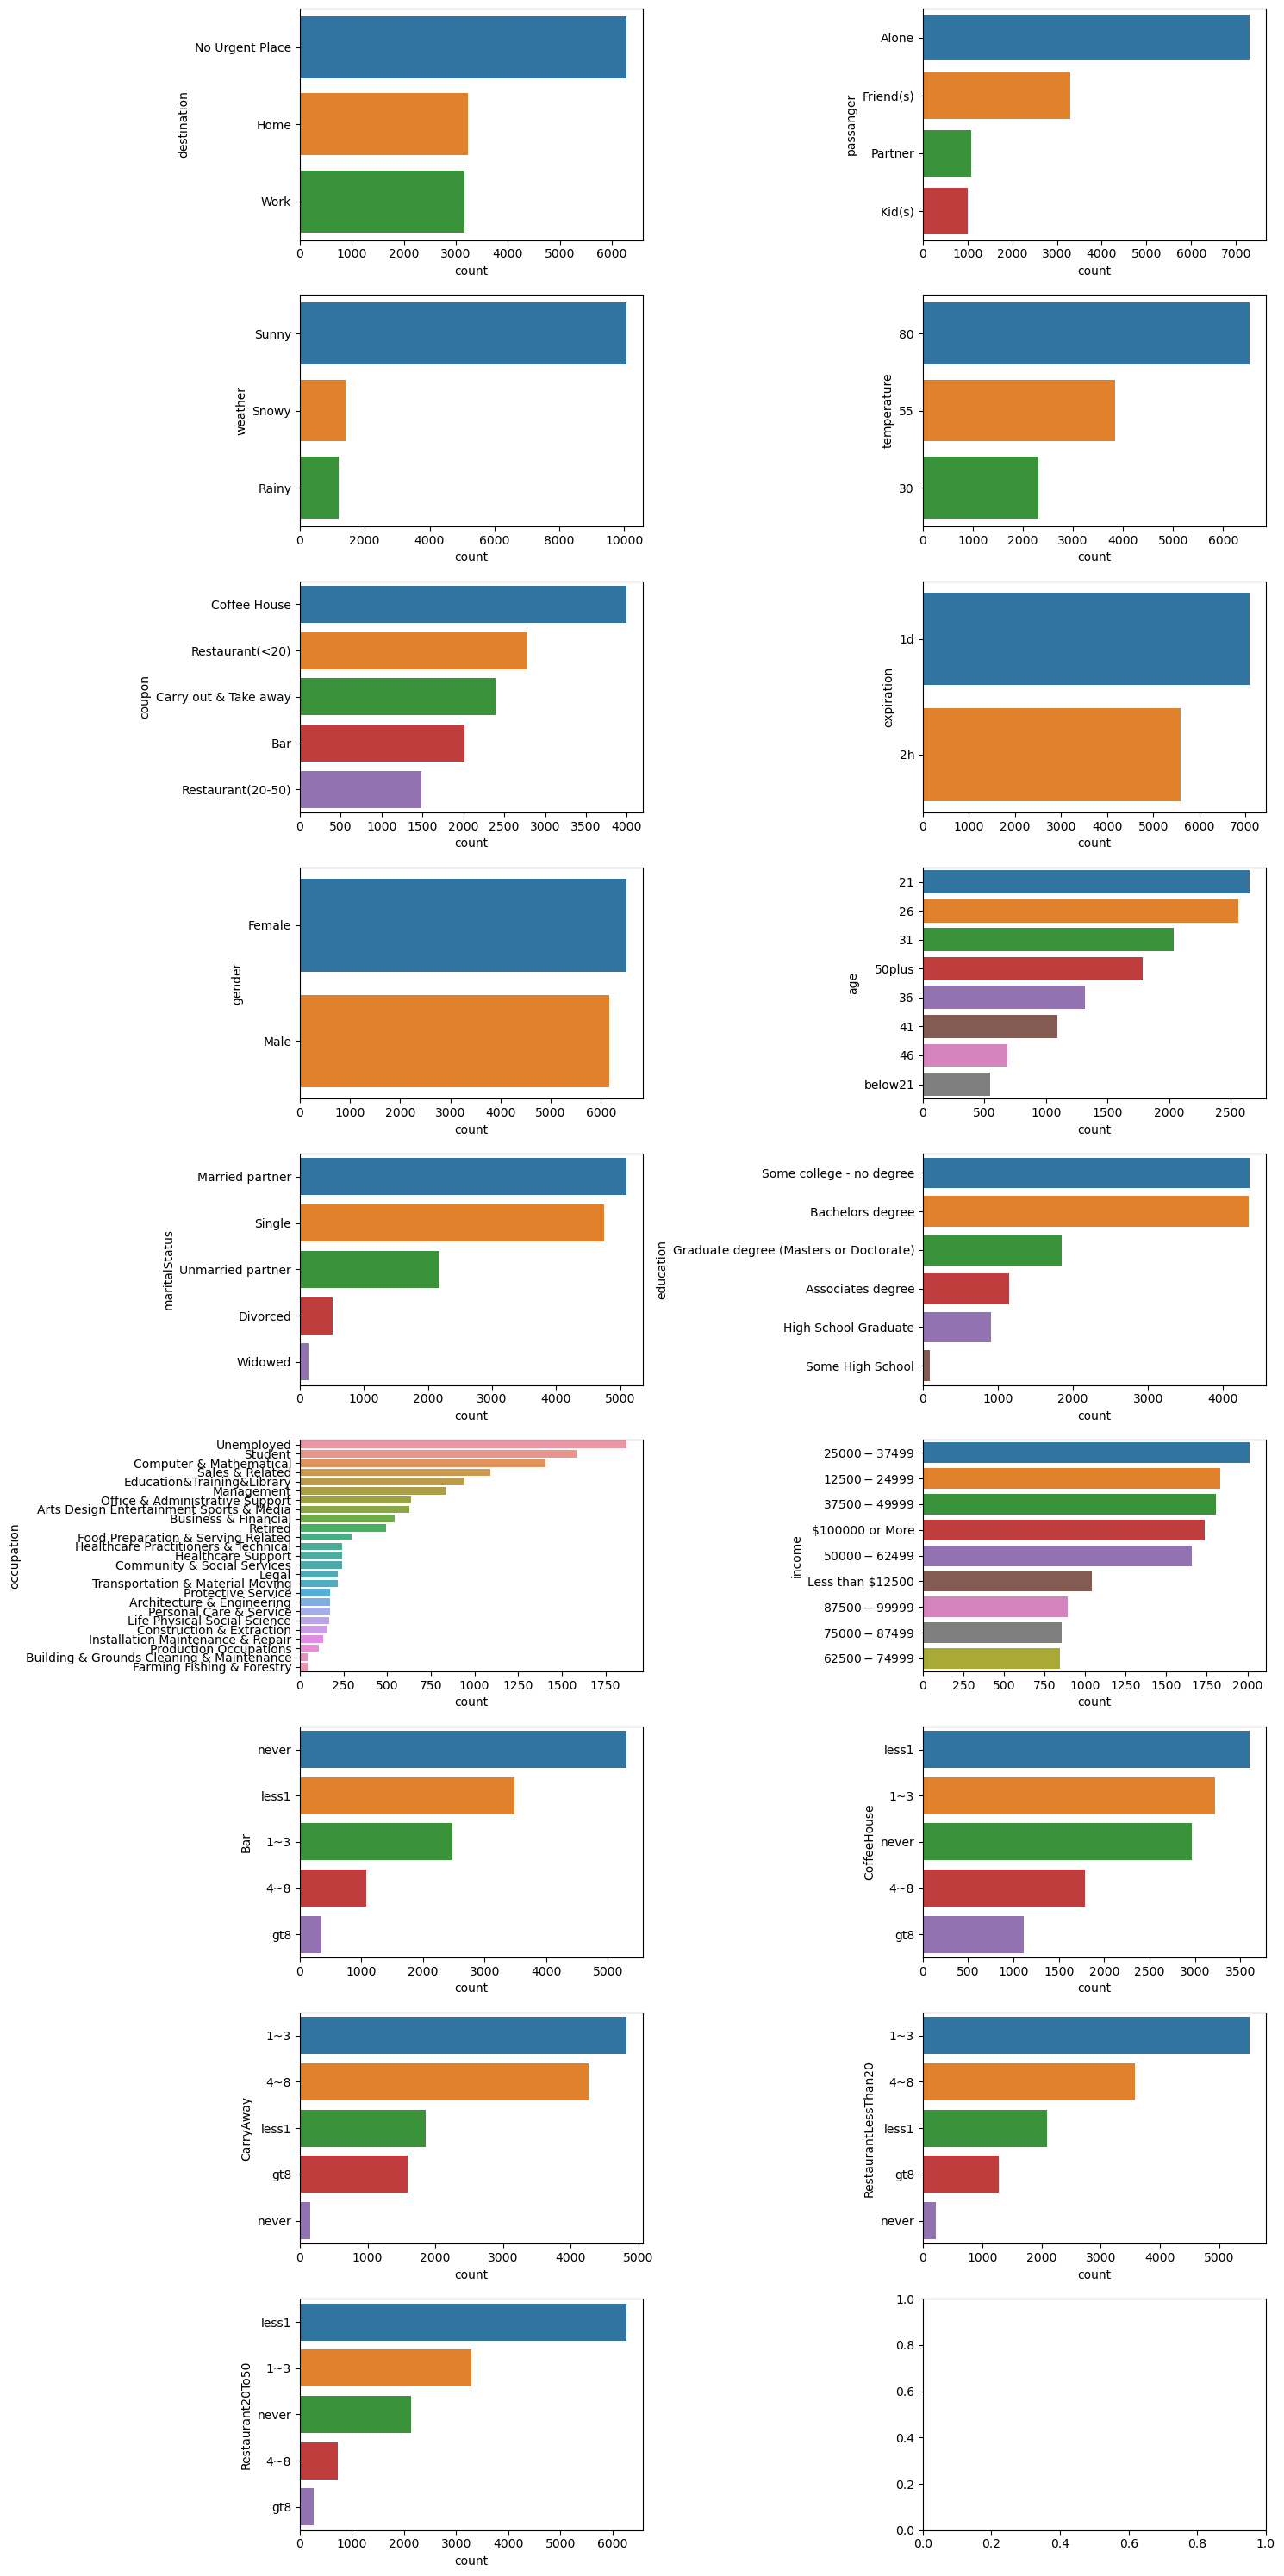

In [15]:
fig, axes = plt.subplots(9, 2, figsize=(15,30))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('category').columns):
    sns.countplot(y=col, data=df, ax=ax, order=df[col].value_counts().index); 

plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(dtype='int64')

df_cat = df.select_dtypes(include=['category']).copy()
df_int = df.select_dtypes(include=['int64']).copy()

df_enc = pd.DataFrame()
for col in df_cat.columns:
    enc_results = enc.fit_transform(df_cat[[col]])
    df0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_)
    df_enc = pd.concat([df_enc,df0], axis=1)
    
df_final = pd.concat([df_enc, df_int], axis=1)

In [17]:
df_final

,"(Home,)","(No Urgent Place,)","(Work,)","(Alone,)","(Friend(s),)","(Kid(s),)","(Partner,)","(Rainy,)","(Snowy,)","(Sunny,)",...,"(4~8,)","(gt8,)","(less1,)","(never,)",has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


## Data Modeling

In [18]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from math import sqrt

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:, :-1].values, df_final.iloc[:, -1].values, test_size=0.3, random_state=0 )


## Random Forest

In [21]:
RF = RandomForestClassifier().fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)
score_RF = RF.score(X_test,y_test)

#print('The accuracy of the Random Forest Model is', score_RF)
#targets = ['<=50k' , '>50k']
print(classification_report(y_test, y_pred_RF))
#,target_names=targets
#print('RMSE =', sqrt(mean_squared_error(y_test,  y_pred_RF)))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1696
           1       0.75      0.82      0.78      2110

    accuracy                           0.75      3806
   macro avg       0.75      0.74      0.74      3806
weighted avg       0.75      0.75      0.75      3806



In [22]:
from sklearn.metrics import confusion_matrix

cm_RF = confusion_matrix(y_test,y_pred_RF)
pd.crosstab(y_test, y_pred_RF, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,1121,575,1696
1,377,1733,2110
All,1498,2308,3806


## Confusion Matrix

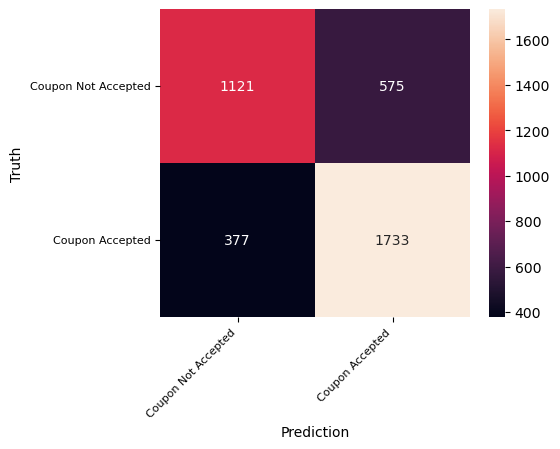

In [23]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (5,4), fontsize=8):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

print_confusion_matrix(cm_RF,["Coupon Not Accepted", "Coupon Accepted"])

## ROC Curves(Receiver Operating Characteristic Curve)


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

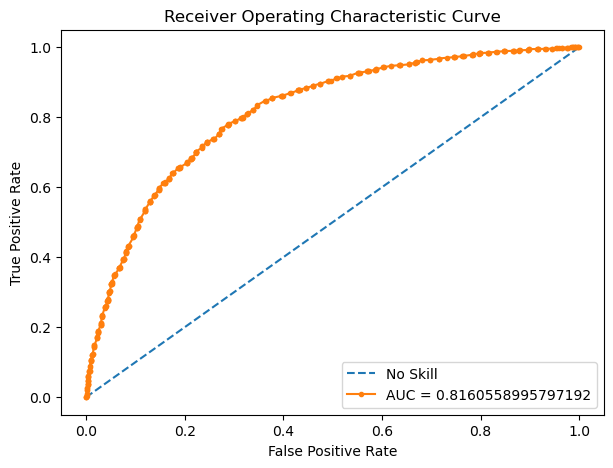

In [25]:
y_pred_proba = RF.predict_proba(X_test)[:,1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print(f'Receiver Operating Characteristic AUC = {roc_auc}')

plt.figure(figsize = (7,5))
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, thresholds_ = roc_curve(y_test, y_pred_proba)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='AUC = '+str(roc_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
# show the legend
plt.legend(loc=4)
# show the plot
plt.show()

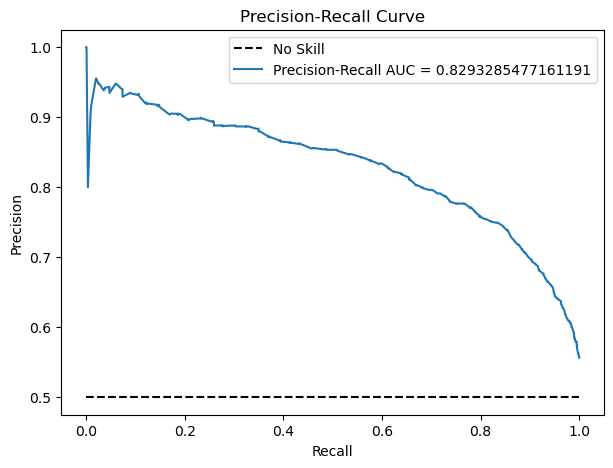

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (7,5))
plt.plot([0, 1], [0.5, 0.5],'k--', label = 'No Skill')
prc_auc = auc(recall, precision)
plt.plot(recall, precision, label = 'Precision-Recall AUC = '+str(prc_auc))
plt.legend(loc=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()